# XGBoosting

 - Large dataset - fast performance
 - Most powerfull implementation of gradient boosting in terms of model performance and execution speed

In [4]:
from xgboost import XGBClassifier as XGBC
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
dataset=pd.read_csv(r"../Datasets/Churn_Modelling.csv")

In [13]:
# # import labelencoder
from sklearn.preprocessing import LabelEncoder

# # instantiate labelencoder object
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

# # using one hot enconder
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)

ds_encoded = pd.DataFrame(encoder.fit_transform(dataset[['Geography']]))

ds_encoded.columns = encoder.get_feature_names(['Geography'])

dataset.drop(['Geography'] ,axis=1, inplace=True)

dataset= pd.concat([dataset, ds_encoded], axis=1)

dataset = dataset[['RowNumber', 'CustomerId', 'Surname', 'Geography_France', 'Geography_Germany',
                   'Geography_Spain', 'Gender', 'CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                   'EstimatedSalary', 'Exited']]

X=dataset.iloc[:,4:-1].values
y=dataset.iloc[:,-1].values

X_col = dataset.columns[2:4]

# # Splitting training and testing
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=0)

# # # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_X=StandardScaler()
# X_train=sc_X.fit_transform(X_train)
# X_test=sc_X.transform(X_test)
# X=sc_X.transform(X)

In [19]:
#fitting XGBoost to the training set
# classifier = XGBC(n_estimators= 200, verbosity=3)
classifier = XGBC(verbosity=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

[14:19:32] ======== Monitor: Learner ========
[14:19:32] Configure: 0s, 1 calls @ 0us

[14:19:32] GetGradient: 0.177085s, 200 calls @ 177085us

[14:19:32] PredictRaw: 0.012006s, 200 calls @ 12006us

[14:19:32] UpdateOneIter: 1.97628s, 200 calls @ 1976283us

[14:19:32] ======== Monitor: GBTree ========
[14:19:32] BoostNewTrees: 1.57685s, 200 calls @ 1576853us

[14:19:32] CommitModel: 0.227211s, 200 calls @ 227211us

[14:19:32] ======== Monitor:  ========
[14:19:32] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\gbm\gbtree.cc:146: Using tree method: 2
[14:19:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:19:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:19:32] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\s

[14:19:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:19:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:19:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[14:19:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[14:19:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:19:33] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 114 extra nodes, 0 prune

In [22]:
# classifier.best_ntree_limit

classifier.predict(X_test, ntree_limit=20)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
# Apply k-Fold Cross Validation
from sklearn.model_selection import cross_val_score as cvs
accuracies = cvs(estimator=classifier, X= X_train,y=y_train, cv=10)

Text(0.5, 0, 'fold')

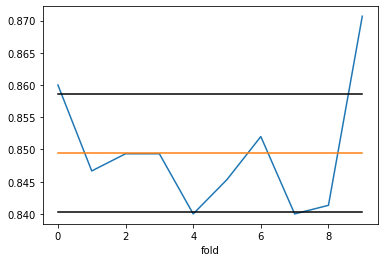

In [19]:
plt.plot(accuracies)
plt.plot(np.ones(len(accuracies))*np.mean(accuracies))
plt.plot(np.ones(len(accuracies))*(np.mean(accuracies)+np.std(accuracies)),'black')
plt.plot(np.ones(len(accuracies))*(np.mean(accuracies)-np.std(accuracies)),'black')
plt.xlabel('fold')

In [20]:
from sklearn.metrics import confusion_matrix

df_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['MODEL_1','MODEL_2'
                                                                      ], index = ['DATA_1','DATA_2'])


from IPython.display import HTML
s  = '<script type="text/Javascript">'
s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=no, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
s += 'win.document.body.innerHTML = \'' + df_confusion.to_html().replace("\n",'\\') + '\';'
s += '</script>'

# Show in new Window
HTML(s)